# 🚴‍♂️ Projecte: Predicció de Freqüència Cardíaca en Ciclisme 🏆

**Objectiu:**  
Desenvolupar un model Multi-Layer Perceptron (MLP) per predir el pols (❤️ BPM) durant entrenaments de ciclisme.

📈 **Dades Utilitzades:**
- **Variables d'entrada:**  
  🚴‍♂️ Potència (W) • 🌀 Cadència (rpm) • 🏎️ Velocitat (km/h) • 🏔️ Altitud 
- **Variable objectiu:**  
  ❤️ Freqüència cardíaca (BPM)
  
🎯 **Metodologia:**
- Començar amb un model MLP molt simple
- Anar afegint complexitat  
- Comparar els procediments

🔍 **Mètriques d'Avaluació:**
- MAE (Error Absolut Mitjà) 📏  
- RMSE (Error Quadràtic Mitjà) 📉  
- R² (Variança Explicada) 💯  

**Tecnologies:**  
🐍 Python • � TensorFlow/Keras • 🐼 Pandas • 📊 Matplotlib  

## Processament de les dades

### 🚀 Cel·la 1: Configuració inicial i imports 📚

Aquesta cel·la és el punt de partida del nostre projecte! 🏁 Aquí configurem totes les eines i llibreries que necessitarem. 💻✨

#### 📦 **Imports de llibreries**
Importem totes les llibreries essencials per al nostre treball:
- `os` i `pathlib` 🗂️ - Per gestionar rutes i fitxers del sistema
- `re` 🔍 - Per expressions regulars (útil per processar text)
- `numpy` (`np`) 🧮 - El rei dels càlculs numèrics a Python
- `pandas` (`pd`) 🐼 - La millor eina per treballar amb dades estructurades!
- `matplotlib` i `seaborn` 📊 - Per crear gràfics bonics i visuals
- `tensorflow` 🧠💻 - La poderosa llibreria de deep learning que utilitzarem
- `sklearn` 📏 - Per mètriques d'avaluació (MAE, MSE)

#### ⚙️ **Configuració inicial**
- `logging` 📝 - Configurem el sistema de logging per registrar informació important
- Creem un `logger` personalitzat per seguir el progrés del nostre codi 🚦

#### 🌍 **Constants globals**
Definim algunes constants que utilitzarem més endavant:
- `INPUT_FOLDER` 📁 - La carpeta on buscarem els fitxers CSV d'entrada
- `OUTPUT_FILE` 💾 - El nom del fitxer concatenat que generarem

🔹 **Funció d'aquesta cel·la:** Preparar l'entorn de treball amb totes les eines necessàries! 🛠️💡

In [1]:
# --- Cel·la 1.1: Configuració inicial i imports ---
import os
import re
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import logging
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Configurar logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

### 🏃‍♂️ Cel·la 2: Execució i visualització de dades 📊 

**Si hi ha dades (✅):**  
🐼 Mostra 3 files d'exemple (`.head(3)`)  
📋 Informació bàsica:
- 📅 Rang de dates  
- 🗑️ Valors nuls per columna  
- 📂 Distribució per fitxer origen  

**Si no hi ha dades (❌):**  
🚨 Missatge d'error per revisar fitxers  

**Què aconseguim?**  
✔️ Verificació ràpida de la qualitat de dades  
✔️ Comprensió inicial del dataset  
✔️ Detecció de problemes (valors nuls)  

Visualització clau abans d'analitzar! 🔍✨

In [2]:
# --- Cel·la 1.2: Executar la càrrega i mostrar resultats ---
# Executem la funció principal
df_concatenat = pd.read_csv("concatenated_data.csv")

if df_concatenat is not None:
    # Mostrem informació bàsica
    display(df_concatenat.head(3))
    
    # Anàlisi exploratori bàsic
    print("\n🔍 Informació bàsica:")
    print(f"- Columnes disponibles: {list(df_concatenat.columns)}")
    print(f"- Valors nuls per columna:")
    print(df_concatenat.isnull().sum())
    
    # Distribució per fitxer
    print("\n📂 Distribució per fitxer d'origen:")
    display(df_concatenat['source_file'].value_counts().head(10))
else:
    print("No s'han pogut carregar dades. Verifica els fitxers d'entrada.")

,timestamp,heart_rate,cadence,distance,power,temperature,speed,altitude,alt_difference,rolling_ave_alt,power_ma,cadence_ma,source_file
0,1,90,59.0,6.19,142.0,28,2.855,53,0,0.0,142.000000,59.000000,cycling_2024_08_06_1
1,2,90,66.0,9.70,111.0,28,3.294,53,0,0.0,126.500000,62.500000,cycling_2024_08_06_1
2,3,90,66.0,13.85,4.0,28,3.956,53,0,0.0,85.666667,63.666667,cycling_2024_08_06_1



🔍 Informació bàsica:
- Columnes disponibles: ['timestamp', 'heart_rate', 'cadence', 'distance', 'power', 'temperature', 'speed', 'altitude', 'alt_difference', 'rolling_ave_alt', 'power_ma', 'cadence_ma', 'source_file']
- Valors nuls per columna:
timestamp          0
heart_rate         0
cadence            0
distance           0
power              0
temperature        0
speed              0
altitude           0
alt_difference     0
rolling_ave_alt    0
power_ma           0
cadence_ma         0
source_file        0
dtype: int64

📂 Distribució per fitxer d'origen:


source_file
cycling_2024_11_23_1    11747
cycling_2024_10_12_1    11700
cycling_2024_11_09_1    11610
cycling_2024_10_05_1    11090
cycling_2024_11_17_1     9962
cycling_2024_10_18_1     8917
cycling_2024_08_29_1     8850
cycling_2024_11_01_1     8740
cycling_2024_08_08_1     8215
cycling_2024_09_08_1     8185
Name: count, dtype: int64

### 🔢 Cel·la 3: DataFrame → Arrays NumPy

**Funció:** `preparar_arrays()`  
✨ Converteix dades a format per models ML/DL  

**Inputs:**  
🐼 DataFrame + columna objectiu (`heart_rate` per defecte)  
📋 Llista opcional de features (o automàtic)  

**Outputs:**  
❤️ `heart_rate_array` (objectiu)  
🛠️ `raw_data_array` (features)  

**Errors que captura:**  
❌ Columnes inexistents  
📏 Mides incompatibles  
💥 Errors de conversió    

**Resultat:**  
✅ Arrays optimitzats (`float32`)  
📊 Info de mides i columnes usades  

Prepara dades per xarxes neuronals! 🧠➡️🔢

In [5]:
# --- Cel·la 1.4: Preparació arrays numpy (versió millorada) ---
def preparar_arrays(df, target_col='heart_rate', feature_cols=None):
    """
    Converteix DataFrame a arrays numpy amb control d'errors.
    
    Args:
        df (pd.DataFrame): DataFrame amb les dades
        target_col (str): Columna objectiu
        feature_cols (list): Llista de columnes a utilitzar com a features. 
                            Si None, s'utilitzen totes les numèriques.
        
    Returns:
        tuple: (heart_rate_array, raw_data_array) o None si hi ha errors
    """
    try:
        # Verificar columna objectiu
        if target_col not in df.columns:
            raise ValueError(f"Columna {target_col} no trobada")
            
        # Seleccionar columnes de features
        if feature_cols is None:
            # Per defecte: totes les columnes numèriques (excloent metadades)
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            feature_cols = [col for col in numeric_cols if col not in ['fitxer_origen', 'data', target_col]]
        else:
            # Verificar que les columnes sol·licitades existeixen
            for col in feature_cols:
                if col not in df.columns:
                    raise ValueError(f"Columna {col} no trobada")
            
        # Crear arrays
        heart_rate = df[target_col].values.astype(np.float32)
        raw_data = df[feature_cols].values.astype(np.float32)
        
        # Validar mides
        if len(heart_rate) != len(raw_data):
            raise ValueError("Discrepància en mides dels arrays")
            
        logger.info(f"Arrays creats correctament. Mida: {len(heart_rate):,} mostres")
        logger.info(f"Columnes utilitzades: {feature_cols}")
        return heart_rate, raw_data
        
    except Exception as e:
        logger.error(f"Error en preparar arrays: {str(e)}")
        return None, None


# Executar
if df_concatenat is not None:
    columnes_seleccionades = ['heart_rate', 'power_ma', 'cadence', 'rolling_ave_alt']
    heart_rate, raw_data = preparar_arrays(df_concatenat, feature_cols=columnes_seleccionades)
    
    if heart_rate is not None:
        print("\nMostra dels arrays:")
        print(f"heart_rate (5 valors): {heart_rate[:5]}")
        print(f"raw_data (forma): {raw_data.shape}")
        print(f"raw_data (primera fila): {raw_data[0]}")

INFO:__main__:Arrays creats correctament. Mida: 397,648 mostres
INFO:__main__:Columnes utilitzades: ['heart_rate', 'power_ma', 'cadence', 'rolling_ave_alt']



Mostra dels arrays:
heart_rate (5 valors): [90. 90. 90. 89. 88.]
raw_data (forma): (397648, 4)
raw_data (primera fila): [ 90. 142.  59.   0.]


### 🔄 Cel·la 5: Normalització de Dades

**Funció:** `normalitzar_arrays()`  
✨ Converteix dades a escala estàndard (mean=0, std=1)  
📉 Utilitza StandardScaler de sklearn  

**Funció:** `desnormalitzar_arrays()`  
↩️ Reverteix la normalització als valors originals  

1. **Normalització**  
   - ❤️ Freq. cardíaca: `StandardScaler()`  
   - 🚴 Features: `StandardScaler()`  
2. **Verificació**  
   - ✅ Compara valors abans/després  
   - 🔍 Mostra exemple concret  

**Sortides:**  
- Mitjanes normalitzades (~0)  
- Exemple de valors transformats  
- Verificació de conversió exacta  

*Prepara dades per a millor rendiment dels models!* 🚀

In [7]:
# Cel·la 1.5: Normalització de les dades
def normalitzar_arrays(heart_rate, raw_data, feature_cols):
    """
    Normalitza els arrays de heart_rate i raw_data utilitzant StandardScaler.
    
    Args:
        heart_rate (np.array): Array amb els valors de freqüència cardíaca
        raw_data (np.array): Array amb les features
        feature_cols (list): Llista de noms de les columnes de features
        
    Returns:
        tuple: (heart_rate_norm, raw_data_norm, scaler) o (None, None, None) si hi ha errors
    """
    
    try:
        logger.info("Iniciant normalització dels arrays...")
        
        # 1. Normalitzar heart_rate (target)
        hr_scaler = StandardScaler()
        heart_rate_norm = hr_scaler.fit_transform(heart_rate.reshape(-1, 1)).flatten()
        
        # 2. Normalitzar raw_data (features)
        data_scaler = StandardScaler() # Això no és una funció, és una classe
        raw_data_norm = data_scaler.fit_transform(raw_data)
        
        logger.info("✅ Arrays normalitzats correctament")
        logger.info(f"Mitjana heart_rate (abans): {heart_rate.mean():.2f} (després): {heart_rate_norm.mean():.2f}")
        logger.info(f"Mitjana features (abans): {raw_data.mean(axis=0)} (després): {raw_data_norm.mean(axis=0)}")
        
        return heart_rate_norm, raw_data_norm, (hr_scaler, data_scaler)
        
    except Exception as e:
        logger.error(f"❌ Error en normalitzar arrays: {str(e)}")
        return None, None, None

def desnormalitzar_arrays(heart_rate_norm, raw_data_norm, scalers):
    """
    Desnormalitza els arrays als valors originals.
    
    Args:
        heart_rate_norm (np.array): Array normalitzat de freqüència cardíaca
        raw_data_norm (np.array): Array normalitzat de features
        scalers (tuple): Tupla amb els scalers (hr_scaler, data_scaler)
        
    Returns:
        tuple: (heart_rate_original, raw_data_original) o (None, None) si hi ha errors
    """
    try:
        hr_scaler, data_scaler = scalers
        
        # 1. Desnormalitzar heart_rate
        heart_rate_original = hr_scaler.inverse_transform(heart_rate_norm.reshape(-1, 1)).flatten()
        # El reshape i flateen serveix perquè la funció rebi l'input en el format adequat
        
        # 2. Desnormalitzar raw_data
        raw_data_original = data_scaler.inverse_transform(raw_data_norm)
        
        logger.info("✅ Arrays desnormalitzats correctament")
        return heart_rate_original, raw_data_original
        
    except Exception as e:
        logger.error(f"❌ Error en desnormalitzar arrays: {str(e)}")
        return None, None

# --- Execució ---
if heart_rate is not None and raw_data is not None:
    # 1. Normalitzar arrays
    heart_rate_norm, raw_data_norm, scalers = normalitzar_arrays(heart_rate, raw_data, columnes_seleccionades)
    
    if heart_rate_norm is not None:
        # Mostrar resultats
        print("\n📊 Resultats de la normalització:")
        print(f"heart_rate normalitzat (5 valors): {heart_rate_norm[:5]}")
        print(f"raw_data normalitzat (primera fila): {raw_data_norm[0]}")
        print(f"Mitjana raw_data normalitzat (per columna): {np.mean(raw_data_norm, axis=0)}")
        
        # 2. Verificació amb desnormalització
        hr_original, data_original = desnormalitzar_arrays(heart_rate_norm, raw_data_norm, scalers)
        
        print("\n🔍 Verificació de desnormalització:")
        print(f"Coincidència heart_rate: {np.allclose(heart_rate[:100], hr_original[:100], atol=1e-5)}")  # Comparem només 100 valors per eficiència
        print(f"Coincidència raw_data: {np.allclose(raw_data[:100], data_original[:100], atol=1e-5)}")
        
        # Mostrar exemple
        print("\nExemple concret:")
        idx = 0  # Primer element
        print(f"Original - HR: {heart_rate[idx]}, Features: {raw_data[idx]}")
        print(f"Normalitzat - HR: {heart_rate_norm[idx]:.4f}, Features: {[f'{x:.4f}' for x in raw_data_norm[idx]]}")
        print(f"Desnormalitzat - HR: {hr_original[idx]}, Features: {data_original[idx]}")

INFO:__main__:Iniciant normalització dels arrays...
INFO:__main__:✅ Arrays normalitzats correctament
INFO:__main__:Mitjana heart_rate (abans): 142.54 (després): -0.00
INFO:__main__:Mitjana features (abans): [ 1.4254089e+02  2.0712263e+02  8.0635513e+01 -2.1576739e-04] (després): [-6.1396166e-10  5.5256550e-09  3.2232987e-09 -8.2117371e-09]
INFO:__main__:✅ Arrays desnormalitzats correctament



📊 Resultats de la normalització:
heart_rate normalitzat (5 valors): [-2.9742124 -2.9742124 -2.9742124 -3.0308201 -3.0874276]
raw_data normalitzat (primera fila): [-2.9742124e+00 -9.5305896e-01 -1.5545293e+00  1.0569171e-03]
Mitjana raw_data normalitzat (per columna): [-6.1396166e-10  5.5256550e-09  3.2232987e-09 -8.2117371e-09]

🔍 Verificació de desnormalització:
Coincidència heart_rate: True
Coincidència raw_data: True

Exemple concret:
Original - HR: 90.0, Features: [ 90. 142.  59.   0.]
Normalitzat - HR: -2.9742, Features: ['-2.9742', '-0.9531', '-1.5545', '0.0011']
Desnormalitzat - HR: 90.0, Features: [ 9.000000e+01  1.420000e+02  5.900000e+01 -5.558922e-12]


### ⏳ Cel·la 6: Creació de Datasets Temporals 🚀

**Funció:** `crear_datasets_series_temporals()`  
🔄 Converteix arrays en datasets temporals per a xarxes neuronals  

#### 🔧 Paràmetres Clau:
- `sequence_length`: Longitud de la finestra temporal ⏱️  
- `delay`: Temps de predicció futur 🔮  
- `sampling_rate`: Frequència de mostreig 📶  
- `batch_size`: Mida del lot 🧺  

#### 📊 Distribució:
- 70% Entrenament 🏋️  
- 15% Validació 🧪  
- 15% Test 📝  

#### ✅ Sortides:
- 3 Datasets TensorFlow 🏗️  
- Info de mides i distribució ℹ️  

#### 🚨 Control d'Errors:
- Verifica proporcions (suma=1) ➕  
- Gestiona mides inconsistents 📏   

**Visualització:**  
📉 Gràfic de distribució de dades  
🔍 Exemple del primer batch  


In [15]:
# Cel·la 1.6: Creació dels Datasets
def crear_datasets_series_temporals(raw_data, heart_rate, 
                                  train_ratio=0.7, val_ratio=0.15, test_ratio=0.15,
                                  sequence_length=120,  
                                  delay=135, 
                                  sampling_rate=1,  
                                  batch_size=256):
    """
    Crea datasets d'entrenament, validació i test per a sèries temporals.
    
    Args:
        raw_data (np.array): Dades normalitzades de features
        heart_rate (np.array): Target normalitzat (freqüència cardíaca)
        train_ratio (float): Proporció per a entrenament (0-1)
        val_ratio (float): Proporció per a validació (0-1)
        test_ratio (float): Proporció per a test (0-1)
        sequence_length (int): Longitud de les seqüències temporals
        delay (int): Endarreriment per a la predicció
        sampling_rate (int): Mostreig dins de la seqüència
        batch_size (int): Mida del batch
        shuffle (bool): Si cal barrejar les dades
    
    Returns:
        tuple: (train_dataset, val_dataset, test_dataset, dataset_info)
    """
    try:
        # 1. Verificar proporcions
        total_ratio = train_ratio + val_ratio + test_ratio
        if not np.isclose(total_ratio, 1.0, atol=0.01):
            raise ValueError(f"Les proporcions sumen {total_ratio:.2f}. Haurien de sumar 1.0")
        
        # 2. Calcular índexs de divisió
        num_samples = len(raw_data) - delay - sequence_length
        num_train = int(num_samples * train_ratio)
        num_val = int(num_samples * val_ratio)
        num_test = num_samples - num_train - num_val
        
        # 3. Crear datasets
        train_dataset = keras.utils.timeseries_dataset_from_array(
            raw_data[:-delay],
            targets=heart_rate[delay:],
            sampling_rate=sampling_rate,
            sequence_length=sequence_length,
            batch_size=batch_size,
            start_index=0,
            end_index=num_train)
        
        val_dataset = keras.utils.timeseries_dataset_from_array(
            raw_data[:-delay],
            targets=heart_rate[delay:],
            sampling_rate=sampling_rate,
            sequence_length=sequence_length,
            batch_size=batch_size,
            start_index=num_train,
            end_index=num_train + num_val)
        
        test_dataset = keras.utils.timeseries_dataset_from_array(
            raw_data[:-delay],
            targets=heart_rate[delay:],
            sampling_rate=sampling_rate,
            sequence_length=sequence_length,
            batch_size=batch_size,
            start_index=num_train + num_val)
        
        # 4. Informació dels datasets
        dataset_info = {
            'train_samples': num_train,
            'val_samples': num_val,
            'test_samples': num_test,
            'sequence_length': sequence_length,
            'delay': delay,
            'sampling_rate': sampling_rate,
            'input_shape': (sequence_length // sampling_rate, raw_data.shape[-1]),
            'total_samples': num_samples
        }
        
        logger.info("\n📊 Distribució de dades:")
        logger.info(f"Entrenament: {num_train} mostres ({train_ratio*100:.1f}%)")
        logger.info(f"Validació: {num_val} mostres ({val_ratio*100:.1f}%)")
        logger.info(f"Test: {num_test} mostres ({test_ratio*100:.1f}%)")
        logger.info(f"Longitud seqüència: {sequence_length} segons")
        logger.info(f"Delay de predicció: {delay} mostres")
        
        return train_dataset, val_dataset, test_dataset, dataset_info
        
    except Exception as e:
        logger.error(f"❌ Error en crear datasets: {str(e)}")
        return None, None, None, None

# --- Execució ---
if heart_rate_norm is not None and raw_data_norm is not None:
    # Configuració recomanada (modificar segons necessitat):
    # - 70% entrenament, 15% validació, 15% test
    # - Seqüències de 6 hores (24 mostres * 6 = 144 si tens dades cada 10 min)
    # - Predir 1 hora endavant (delay=6)
    
    train_ds, val_ds, test_ds, ds_info = crear_datasets_series_temporals(
        raw_data_norm, 
        heart_rate_norm,
        train_ratio=0.7,
        val_ratio=0.15,
        test_ratio=0.15,
        sequence_length=120,  
        delay=20,  
        sampling_rate=1,  # Mostreig cada hora
        batch_size=256
    )
    
    if train_ds is not None:
        # Mostrar informació dels batches
        for batch, targets in train_ds.take(1):
            print("\n🔍 Exemple del primer batch d'entrenament:")
            print(f"- Dades: {batch.shape} (batch, timesteps, features)")
            print(f"- Targets: {targets.shape} (batch,)")
            print(f"- Input shape: {ds_info['input_shape']}")


INFO:__main__:
📊 Distribució de dades:
INFO:__main__:Entrenament: 278255 mostres (70.0%)
INFO:__main__:Validació: 59626 mostres (15.0%)
INFO:__main__:Test: 59627 mostres (15.0%)
INFO:__main__:Longitud seqüència: 120 segons
INFO:__main__:Delay de predicció: 20 mostres



🔍 Exemple del primer batch d'entrenament:
- Dades: (256, 120, 4) (batch, timesteps, features)
- Targets: (256,) (batch,)
- Input shape: (120, 4)


In [17]:
# Cel·la 2.1: callbacks
def get_callbacks(monitor_metric='val_loss', 
                      checkpoint_path='best_model.weights.h5',
                      patience_early=15,
                      patience_lr=8,
                      log_dir=None):
    """
    Callbacks compartits per tots els models amb opcions configurables
    
    Args:
        monitor_metric: Mètrica a monitoritzar (val_loss, val_mae, etc.)
        checkpoint_path: Ruta per desar els pesos
        patience_early: Paciència per EarlyStopping
        patience_lr: Paciència per ReduceLROnPlateau
        log_dir: Directori per TensorBoard (None per desactivar)
    """
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor=monitor_metric,
            patience=patience_early,
            restore_best_weights=True,
            verbose=1
        ),
        keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            monitor=monitor_metric,
            save_best_only=True,
            save_weights_only=True,
            verbose=0
        )]
    return callbacks

## Multi$-$Layer Perceptron (MLP)

In [29]:
# Cel·la 2.1: Arquitectura del model MLP
def model_mlp(input_shape):
    """
    MLP bàsic
    
    Args:
        input_shape (tuple): Forma de les dades d'entrada (timesteps, features)
    
    Returns:
        model: Model Keras compilat amb més capacitat
    """
    # Definir arquitectura
    inputs = keras.layers.Input(shape=input_shape)
    
    # Aplanar les dades temporals (alternativa més flexible que GlobalAverage)
    x = keras.layers.GlobalAveragePooling1D()(inputs)
    x = keras.layers.Dense(128, activation='relu')(x) 
    x = keras.layers.Dense(64, activation='relu')(x) 
    x = keras.layers.Dense(32, activation='relu')(x)
    
    # Capa de sortida lineal
    outputs = keras.layers.Dense(1)(x)
    
    # Crear model
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compilar el model amb un learning rate personalitzat
    optimizer = keras.optimizers.Adam()
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mse']
    )
    
    return model


In [31]:
# Cel·la 2.2: Entrenament del model MLP

# 1. Obtenir forma d'entrada (ara serà (n_features,))
input_shape = ds_info['input_shape']  # Exemple: (4,)
print(f"\n🔍 Forma d'entrada del model: {input_shape}")

# 2. Construir model MLP adaptat
model = model_mlp(input_shape)
model.summary()

# 3. Configurar callbacks (mateixos que abans)
callbacks = get_callbacks(
    checkpoint_path="best_model_mlp_simple.weights.h5",
    log_dir='./logs/mlp_simple'
)

# 4. Entrenament
print("\n🚀 Començant l'entrenament del model MLP...")
history = model.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    callbacks=callbacks,
    verbose=1
)


🔍 Forma d'entrada del model: (120, 4)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 120, 4)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 4)                   │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)


🚀 Començant l'entrenament del model MLP...
Epoch 1/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.2725 - mae: 0.3717 - mse: 0.2725 - val_loss: 0.1871 - val_mae: 0.3081 - val_mse: 0.1871
Epoch 2/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.1558 - mae: 0.2769 - mse: 0.1558 - val_loss: 0.1874 - val_mae: 0.3078 - val_mse: 0.1874
Epoch 3/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.1537 - mae: 0.2756 - mse: 0.1537 - val_loss: 0.1869 - val_mae: 0.3085 - val_mse: 0.1869
Epoch 4/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.1521 - mae: 0.2739 - mse: 0.1521 - val_loss: 0.1847 - val_mae: 0.3072 - val_mse: 0.1847
Epoch 5/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.1513 - mae: 0.2729 - mse: 0.1513 - val_loss: 0.1856 - val_mae: 0.3077 - val_mse: 0.1856
Epoch 6/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.1506 - mae: 0.2721 - mse: 0.1506 - val_loss: 0.1862 - val_mae: 0.3079 - val_mse: 0.1862
Epoch 7/100
1087/1087 ━━━━

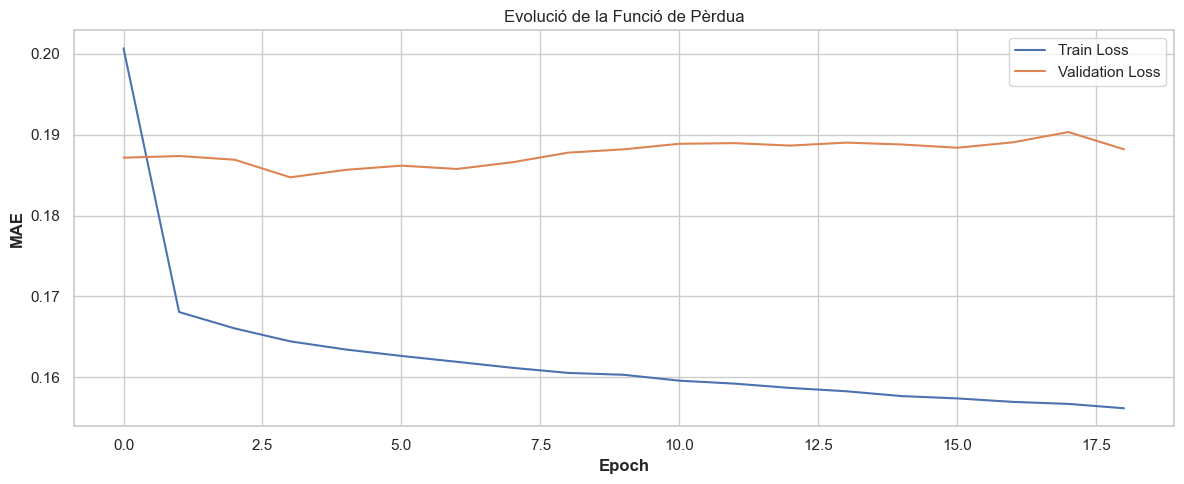

In [39]:
# Cel·la 2.4: Visualització de l'evolució de l'entrenament
plt.figure(figsize=(12, 5))

# Gràfic de la pèrdua
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolució de la Funció de Pèrdua')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()

# Crear la carpeta si no existeix
import os
if not os.path.exists('gràfiques_prediccions'):
    os.makedirs('gràfiques_prediccions')

# Guardar el gràfic en format PDF
plt.savefig('gràfiques_prediccions/loss.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [35]:
# Cel·la 2.5: Avaluació del model amb dades reals

print("\n🔍 Avaluant el model amb dades reals (5 batchs)...")

# Inicialitzem les mètriques
total_mae = 0
total_std = 0
total_max_error = 0
batch_count = 0

# Iterem sobre 5 batchs del conjunt de test
for i, test_batch in enumerate(test_ds.take(20)):
    x_test, y_test_norm = test_batch
    
    # Convertir a numpy arrays si són tensors
    y_test_norm = y_test_norm.numpy() if hasattr(y_test_norm, 'numpy') else y_test_norm
    y_pred_norm = model.predict(x_test).flatten()

    # Verificar que tenim els scalers correctament
    if scalers[0] is None:
        raise ValueError("No s'ha proporcionat el scaler per a la freqüència cardíaca")

    # Desnormalitzar els resultats (versió robusta)
    try:
        y_test_real = scalers[0].inverse_transform(y_test_norm.reshape(-1, 1)).flatten()
        y_pred_real = scalers[0].inverse_transform(y_pred_norm.reshape(-1, 1)).flatten()
    except Exception as e:
        print(f"❌ Error en desnormalitzar batch {i+1}: {str(e)}")
        raise

    # Calcular mètriques per aquest batch
    mae_bpm = np.mean(np.abs(y_test_real - y_pred_real))
    std_bpm = np.std(y_test_real - y_pred_real)
    max_error = np.max(np.abs(y_test_real - y_pred_real))
    
    # Acumular per a la mitjana total
    total_mae += mae_bpm
    total_std += std_bpm
    total_max_error += max_error
    batch_count += 1

    print(f"\n📊 Batch {i+1} - Rendiment en valors reals (bpm):")
    print(f"- MAE: {mae_bpm:.1f} bpm")
    print(f"- Desviació estàndard de l'error: {std_bpm:.1f} bpm")
    print(f"- Error màxim: {max_error:.1f} bpm")

# Calcular mitjanes totals
avg_mae = total_mae / batch_count
avg_std = total_std / batch_count
avg_max_error = total_max_error / batch_count

print("\n" + "="*50)
print("📈 MITJANES TOTALS (5 batchs):")
print(f"- MAE mitjà: {avg_mae:.1f} bpm")
print(f"- Desviació estàndard mitjana: {avg_std:.1f} bpm")
print(f"- Error màxim mitjà: {avg_max_error:.1f} bpm")
print("="*50)



🔍 Avaluant el model amb dades reals (5 batchs)...
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

📊 Batch 1 - Rendiment en valors reals (bpm):
- MAE: 7.8 bpm
- Desviació estàndard de l'error: 8.9 bpm
- Error màxim: 20.5 bpm
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

📊 Batch 2 - Rendiment en valors reals (bpm):
- MAE: 3.3 bpm
- Desviació estàndard de l'error: 4.0 bpm
- Error màxim: 10.3 bpm
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

📊 Batch 3 - Rendiment en valors reals (bpm):
- MAE: 1.6 bpm
- Desviació estàndard de l'error: 2.2 bpm
- Error màxim: 7.8 bpm
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

📊 Batch 4 - Rendiment en valors reals (bpm):
- MAE: 4.7 bpm
- Desviació estàndard de l'error: 5.5 bpm
- Error màxim: 14.1 bpm
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

📊 Batch 5 - Rendiment en valors reals (bpm):
- MAE: 2.2 bpm
- Desviació estàndard de l'error: 2.4 bpm
- Error màxim: 4.8 bpm
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

📊 Batch 6 - Rendiment en valors reals (bpm):
- MAE: 2.1 bpm
- Desviació estàndard de l'e

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:56: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_png, dpi=300)
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_i

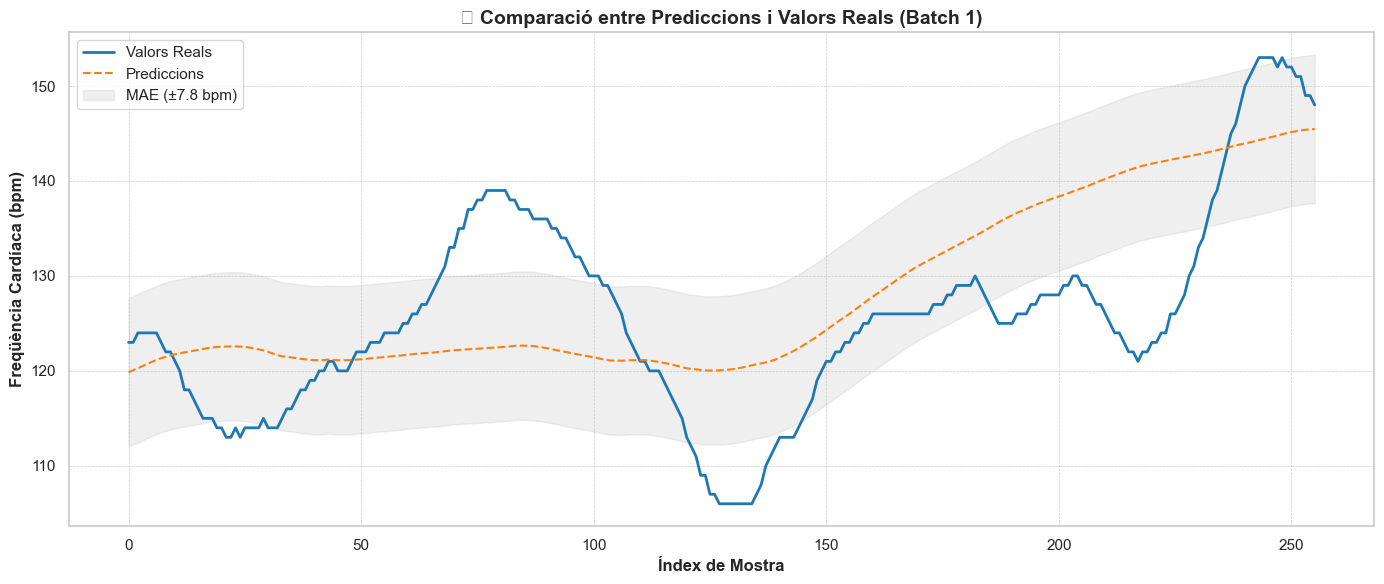

C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:74: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:79: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_png, dpi=300)
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:80: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:80: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font

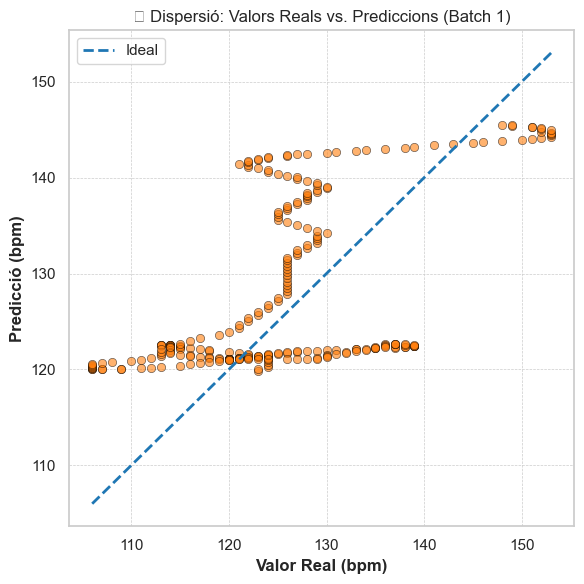

✅ Batch 1 — Línia: gràfiques_prediccions\prediccions_batch_1.png | PDF: gràfiques_prediccions\prediccions_batch_1.pdf
      Dispersió: gràfiques_prediccions\scatter_batch_1.png | PDF: gràfiques_prediccions\scatter_batch_1.pdf
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:56: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_png, dpi=300)
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_i

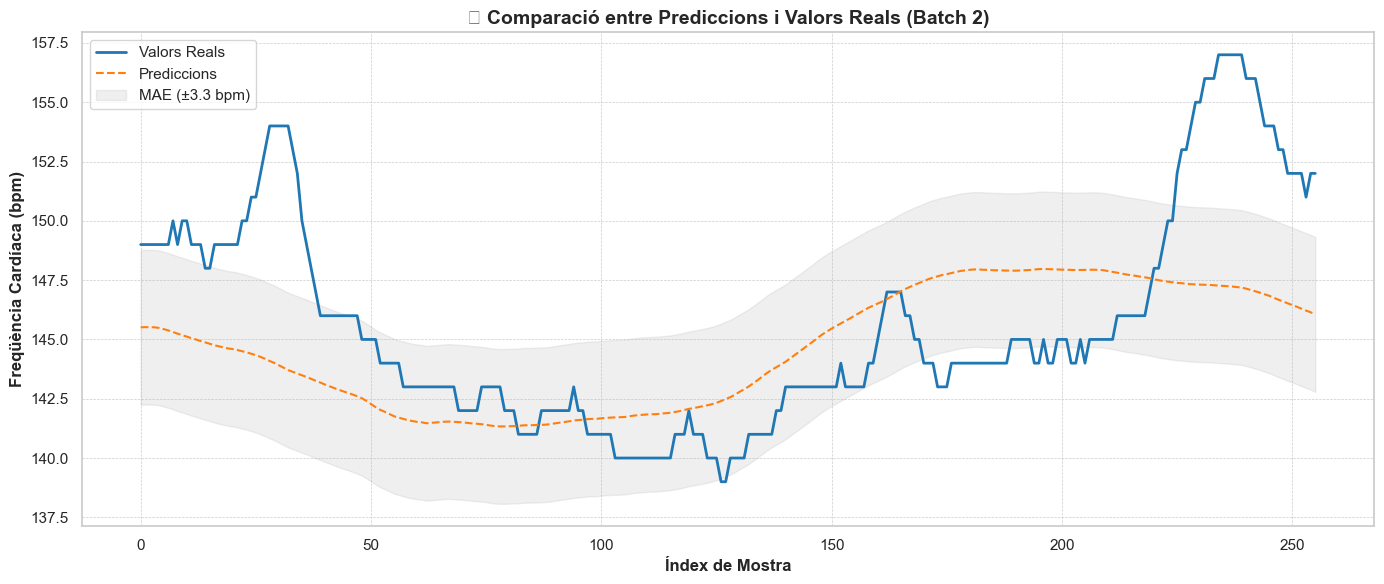

C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:74: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:79: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_png, dpi=300)
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:80: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:80: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font

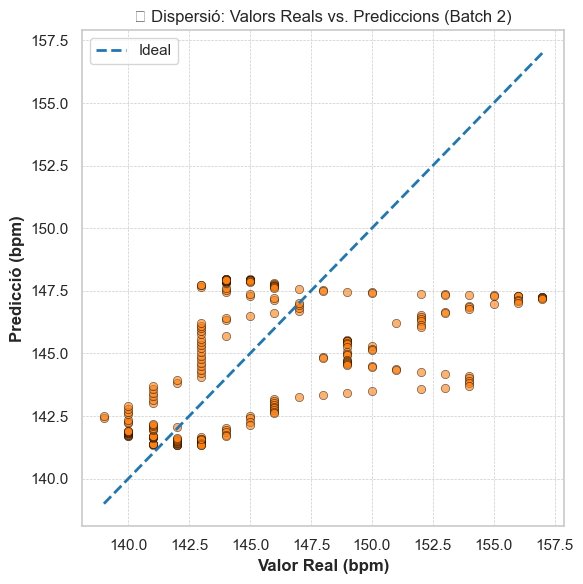

✅ Batch 2 — Línia: gràfiques_prediccions\prediccions_batch_2.png | PDF: gràfiques_prediccions\prediccions_batch_2.pdf
      Dispersió: gràfiques_prediccions\scatter_batch_2.png | PDF: gràfiques_prediccions\scatter_batch_2.pdf
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:56: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_png, dpi=300)
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_i

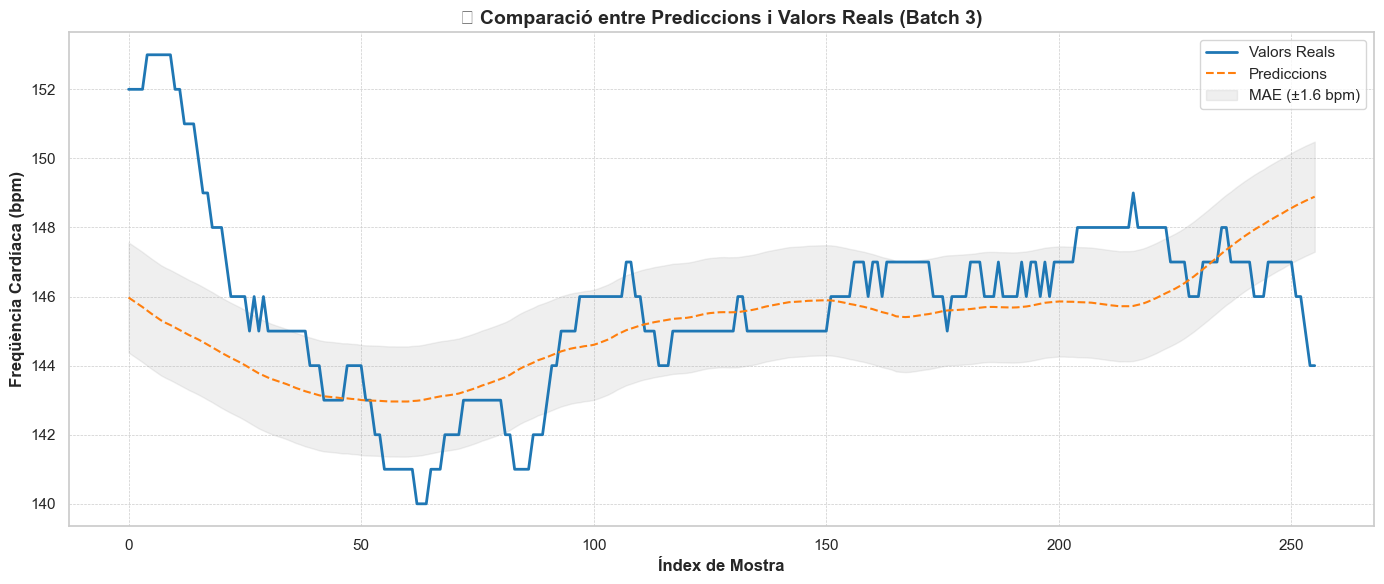

C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:74: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:79: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_png, dpi=300)
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:80: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:80: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font

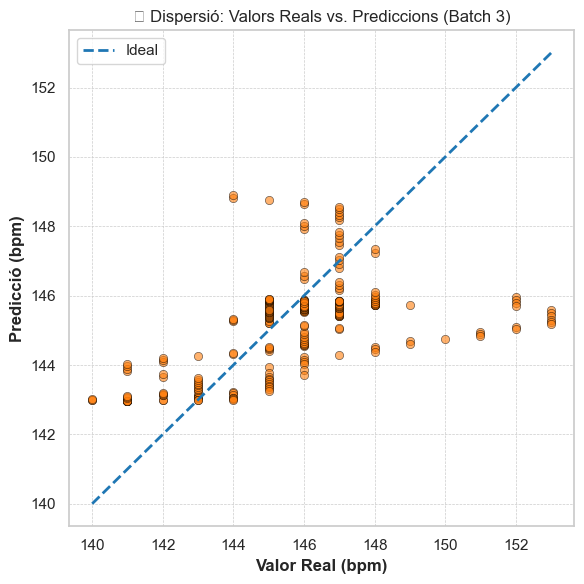

✅ Batch 3 — Línia: gràfiques_prediccions\prediccions_batch_3.png | PDF: gràfiques_prediccions\prediccions_batch_3.pdf
      Dispersió: gràfiques_prediccions\scatter_batch_3.png | PDF: gràfiques_prediccions\scatter_batch_3.pdf
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:56: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_png, dpi=300)
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_i

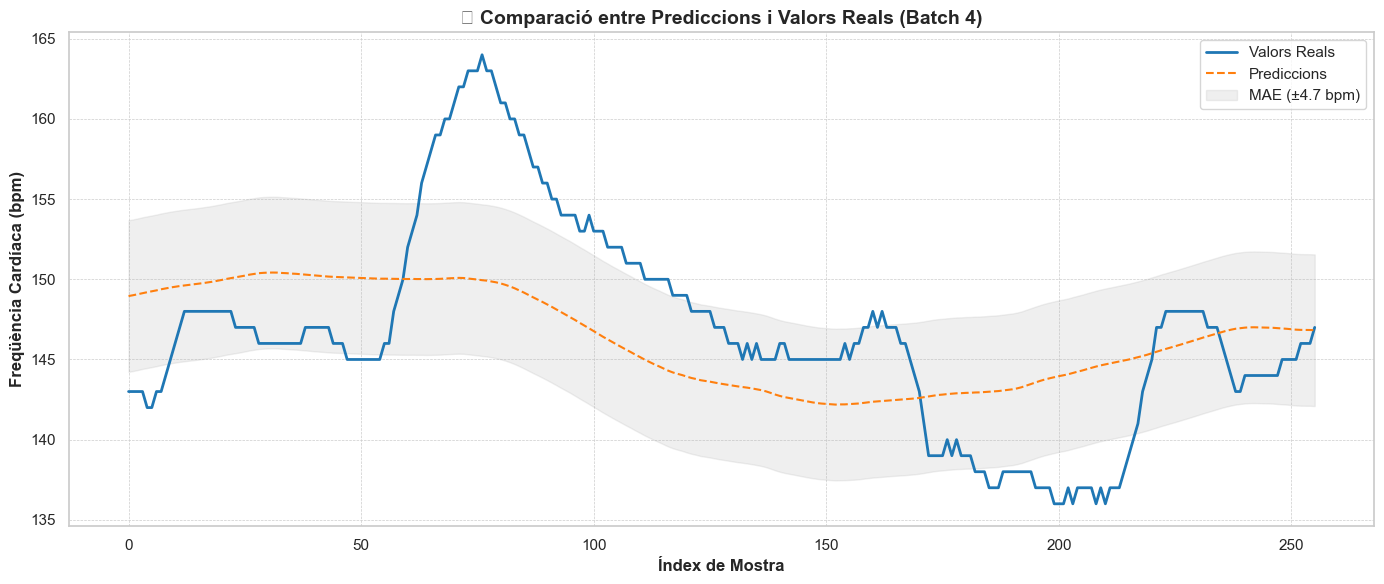

C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:74: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:79: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_png, dpi=300)
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:80: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:80: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font

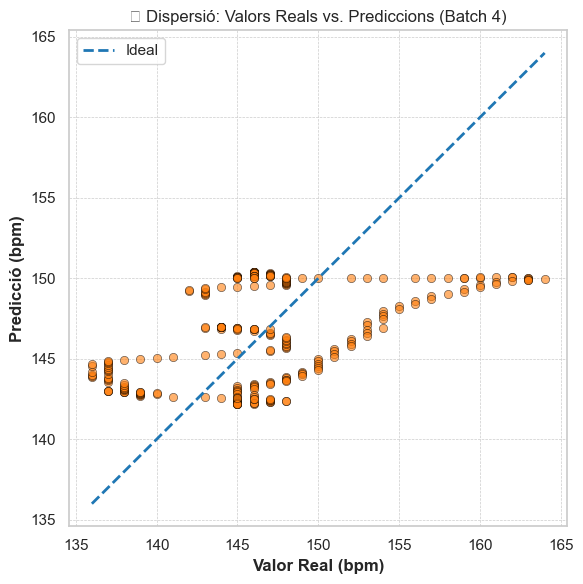

✅ Batch 4 — Línia: gràfiques_prediccions\prediccions_batch_4.png | PDF: gràfiques_prediccions\prediccions_batch_4.pdf
      Dispersió: gràfiques_prediccions\scatter_batch_4.png | PDF: gràfiques_prediccions\scatter_batch_4.pdf
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:56: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_png, dpi=300)
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_i

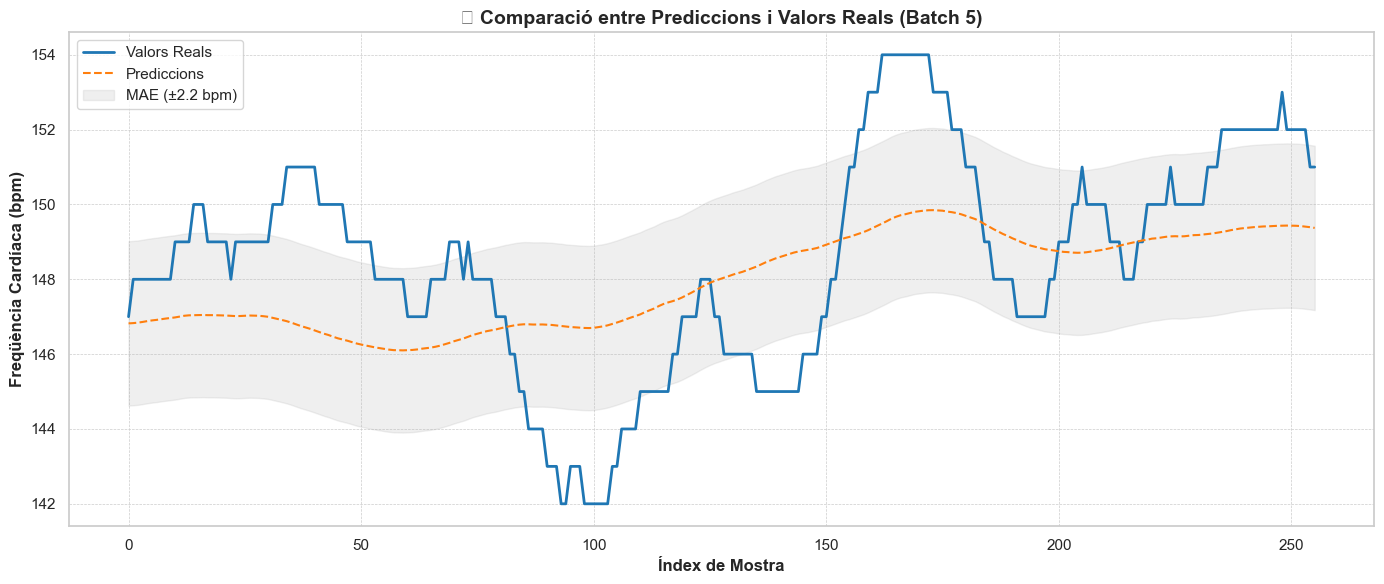

C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:74: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:79: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_png, dpi=300)
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:80: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\AppData\Local\Temp\ipykernel_9904\1177428910.py:80: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
C:\Users\alber\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font

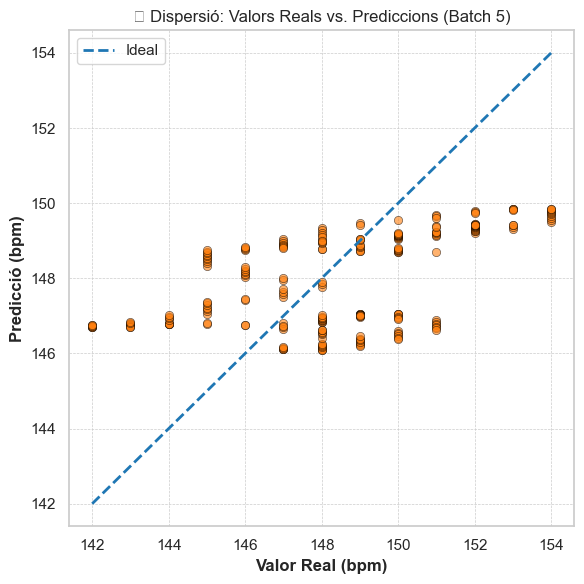

✅ Batch 5 — Línia: gràfiques_prediccions\prediccions_batch_5.png | PDF: gràfiques_prediccions\prediccions_batch_5.pdf
      Dispersió: gràfiques_prediccions\scatter_batch_5.png | PDF: gràfiques_prediccions\scatter_batch_5.pdf


In [37]:
# Cel·la 2.6: Visualització de les prediccions reals

# Crear carpeta de sortida si no existeix
output_dir = 'gràfiques_prediccions'
os.makedirs(output_dir, exist_ok=True)

# Estil professional
sns.set(style='whitegrid')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Verificació del scaler
if scalers[0] is None:
    raise ValueError("No s'ha proporcionat el scaler per a la freqüència cardíaca")

# Colors professionals
color_real = '#1f77b4'      # blau fosc
color_pred = '#ff7f0e'      # taronja crema
color_mae_fill = '#b0b0b0'  # gris clar

# Iterar per 5 batchs del test_ds
for i, batch in enumerate(test_ds.take(5)):
    x_test, y_test_norm = batch
    y_test_norm = y_test_norm.numpy() if hasattr(y_test_norm, 'numpy') else y_test_norm
    
    y_pred_norm = model.predict(x_test).flatten()
    y_test_real = scalers[0].inverse_transform(y_test_norm.reshape(-1, 1)).flatten()
    y_pred_real = scalers[0].inverse_transform(y_pred_norm.reshape(-1, 1)).flatten()
    
    mae_bpm = np.mean(np.abs(y_test_real - y_pred_real))
    n = len(y_test_real)

    # ======= GRÀFICA DE LÍNIA =======
    plt.figure(figsize=(14, 6))
    plt.plot(y_test_real, label='Valors Reals', color=color_real, linewidth=2)
    plt.plot(y_pred_real, label='Prediccions', color=color_pred, linestyle='--', linewidth=1.5)
    plt.fill_between(
        range(n),
        y_pred_real - mae_bpm,
        y_pred_real + mae_bpm,
        color=color_mae_fill,
        alpha=0.2,
        label=f'MAE (±{mae_bpm:.1f} bpm)'
    )
    plt.title(f'📈 Comparació entre Prediccions i Valors Reals (Batch {i+1})', fontsize=14, weight='bold')
    plt.xlabel('Índex de Mostra')
    plt.ylabel('Freqüència Cardíaca (bpm)')
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    # Guardar en PNG i PDF
    filename_line_png = os.path.join(output_dir, f'prediccions_batch_{i+1}.png')
    filename_line_pdf = os.path.join(output_dir, f'prediccions_batch_{i+1}.pdf')
    plt.savefig(filename_line_png, dpi=300)
    plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
    plt.show()

    # ======= GRÀFICA DE DISPERSIÓ =======
    df_scatter = pd.DataFrame({'Real': y_test_real, 'Predicció': y_pred_real})
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x='Real', y='Predicció', data=df_scatter, color=color_pred, edgecolor='black', alpha=0.6)
    plt.plot(
        [df_scatter['Real'].min(), df_scatter['Real'].max()],
        [df_scatter['Real'].min(), df_scatter['Real'].max()],
        color=color_real, linestyle='--', linewidth=2, label='Ideal'
    )
    plt.title(f'🔎 Dispersió: Valors Reals vs. Prediccions (Batch {i+1})')
    plt.xlabel('Valor Real (bpm)')
    plt.ylabel('Predicció (bpm)')
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    # Guardar en PNG i PDF
    filename_scatter_png = os.path.join(output_dir, f'scatter_batch_{i+1}.png')
    filename_scatter_pdf = os.path.join(output_dir, f'scatter_batch_{i+1}.pdf')
    plt.savefig(filename_scatter_png, dpi=300)
    plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
    plt.show()

    print(f"✅ Batch {i+1} — Línia: {filename_line_png} | PDF: {filename_line_pdf}")
    print(f"      Dispersió: {filename_scatter_png} | PDF: {filename_scatter_pdf}")


## Recurrent Neural Networks (RNN)

In [ ]:
# Cel·la 2.1: Arquitectura del model MLP
def model_mlp(input_shape):
    """
    MLP bàsic
    
    Args:
        input_shape (tuple): Forma de les dades d'entrada (timesteps, features)
    
    Returns:
        model: Model Keras compilat amb més capacitat
    """
    # Definir arquitectura
    inputs = keras.layers.Input(shape=input_shape)
    
    # Aplanar les dades temporals (alternativa més flexible que GlobalAverage)
    x = keras.layers.GlobalAveragePooling1D()(inputs)
    x = keras.layers.Dense(128, activation='relu')(x) 
    x = keras.layers.Dense(64, activation='relu')(x) 
    x = keras.layers.Dense(32, activation='relu')(x)
    
    # Capa de sortida lineal
    outputs = keras.layers.Dense(1)(x)
    
    # Crear model
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compilar el model amb un learning rate personalitzat
    optimizer = keras.optimizers.Adam()
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mse']
    )
    
    return model


In [ ]:
# Cel·la 2.2: Entrenament del model MLP

# 1. Obtenir forma d'entrada (ara serà (n_features,))
input_shape = ds_info['input_shape']  # Exemple: (4,)
print(f"\n🔍 Forma d'entrada del model: {input_shape}")

# 2. Construir model MLP adaptat
model = model_mlp(input_shape)
model.summary()

# 3. Configurar callbacks (mateixos que abans)
callbacks = get_callbacks(
    checkpoint_path="best_model_mlp_simple.weights.h5",
    log_dir='./logs/mlp_simple'
)

# 4. Entrenament
print("\n🚀 Començant l'entrenament del model MLP...")
history = model.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
# Cel·la 2.4: Visualització de l'evolució de l'entrenament
plt.figure(figsize=(12, 5))

# Gràfic de la pèrdua
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolució de la Funció de Pèrdua')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()

# Crear la carpeta si no existeix
import os
if not os.path.exists('gràfiques_prediccions'):
    os.makedirs('gràfiques_prediccions')

# Guardar el gràfic en format PDF
plt.savefig('gràfiques_prediccions/loss.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
# Cel·la 2.5: Avaluació del model amb dades reals

print("\n🔍 Avaluant el model amb dades reals (5 batchs)...")

# Inicialitzem les mètriques
total_mae = 0
total_std = 0
total_max_error = 0
batch_count = 0

# Iterem sobre 5 batchs del conjunt de test
for i, test_batch in enumerate(test_ds.take(20)):
    x_test, y_test_norm = test_batch
    
    # Convertir a numpy arrays si són tensors
    y_test_norm = y_test_norm.numpy() if hasattr(y_test_norm, 'numpy') else y_test_norm
    y_pred_norm = model.predict(x_test).flatten()

    # Verificar que tenim els scalers correctament
    if scalers[0] is None:
        raise ValueError("No s'ha proporcionat el scaler per a la freqüència cardíaca")

    # Desnormalitzar els resultats (versió robusta)
    try:
        y_test_real = scalers[0].inverse_transform(y_test_norm.reshape(-1, 1)).flatten()
        y_pred_real = scalers[0].inverse_transform(y_pred_norm.reshape(-1, 1)).flatten()
    except Exception as e:
        print(f"❌ Error en desnormalitzar batch {i+1}: {str(e)}")
        raise

    # Calcular mètriques per aquest batch
    mae_bpm = np.mean(np.abs(y_test_real - y_pred_real))
    std_bpm = np.std(y_test_real - y_pred_real)
    max_error = np.max(np.abs(y_test_real - y_pred_real))
    
    # Acumular per a la mitjana total
    total_mae += mae_bpm
    total_std += std_bpm
    total_max_error += max_error
    batch_count += 1

    print(f"\n📊 Batch {i+1} - Rendiment en valors reals (bpm):")
    print(f"- MAE: {mae_bpm:.1f} bpm")
    print(f"- Desviació estàndard de l'error: {std_bpm:.1f} bpm")
    print(f"- Error màxim: {max_error:.1f} bpm")

# Calcular mitjanes totals
avg_mae = total_mae / batch_count
avg_std = total_std / batch_count
avg_max_error = total_max_error / batch_count

print("\n" + "="*50)
print("📈 MITJANES TOTALS (5 batchs):")
print(f"- MAE mitjà: {avg_mae:.1f} bpm")
print(f"- Desviació estàndard mitjana: {avg_std:.1f} bpm")
print(f"- Error màxim mitjà: {avg_max_error:.1f} bpm")
print("="*50)


In [ ]:
# Cel·la 2.6: Visualització de les prediccions reals

# Crear carpeta de sortida si no existeix
output_dir = 'gràfiques_prediccions'
os.makedirs(output_dir, exist_ok=True)

# Estil professional
sns.set(style='whitegrid')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Verificació del scaler
if scalers[0] is None:
    raise ValueError("No s'ha proporcionat el scaler per a la freqüència cardíaca")

# Colors professionals
color_real = '#1f77b4'      # blau fosc
color_pred = '#ff7f0e'      # taronja crema
color_mae_fill = '#b0b0b0'  # gris clar

# Iterar per 5 batchs del test_ds
for i, batch in enumerate(test_ds.take(5)):
    x_test, y_test_norm = batch
    y_test_norm = y_test_norm.numpy() if hasattr(y_test_norm, 'numpy') else y_test_norm
    
    y_pred_norm = model.predict(x_test).flatten()
    y_test_real = scalers[0].inverse_transform(y_test_norm.reshape(-1, 1)).flatten()
    y_pred_real = scalers[0].inverse_transform(y_pred_norm.reshape(-1, 1)).flatten()
    
    mae_bpm = np.mean(np.abs(y_test_real - y_pred_real))
    n = len(y_test_real)

    # ======= GRÀFICA DE LÍNIA =======
    plt.figure(figsize=(14, 6))
    plt.plot(y_test_real, label='Valors Reals', color=color_real, linewidth=2)
    plt.plot(y_pred_real, label='Prediccions', color=color_pred, linestyle='--', linewidth=1.5)
    plt.fill_between(
        range(n),
        y_pred_real - mae_bpm,
        y_pred_real + mae_bpm,
        color=color_mae_fill,
        alpha=0.2,
        label=f'MAE (±{mae_bpm:.1f} bpm)'
    )
    plt.title(f'📈 Comparació entre Prediccions i Valors Reals (Batch {i+1})', fontsize=14, weight='bold')
    plt.xlabel('Índex de Mostra')
    plt.ylabel('Freqüència Cardíaca (bpm)')
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    # Guardar en PNG i PDF
    filename_line_png = os.path.join(output_dir, f'prediccions_batch_{i+1}.png')
    filename_line_pdf = os.path.join(output_dir, f'prediccions_batch_{i+1}.pdf')
    plt.savefig(filename_line_png, dpi=300)
    plt.savefig(filename_line_pdf, format='pdf', bbox_inches='tight')
    plt.show()

    # ======= GRÀFICA DE DISPERSIÓ =======
    df_scatter = pd.DataFrame({'Real': y_test_real, 'Predicció': y_pred_real})
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x='Real', y='Predicció', data=df_scatter, color=color_pred, edgecolor='black', alpha=0.6)
    plt.plot(
        [df_scatter['Real'].min(), df_scatter['Real'].max()],
        [df_scatter['Real'].min(), df_scatter['Real'].max()],
        color=color_real, linestyle='--', linewidth=2, label='Ideal'
    )
    plt.title(f'🔎 Dispersió: Valors Reals vs. Prediccions (Batch {i+1})')
    plt.xlabel('Valor Real (bpm)')
    plt.ylabel('Predicció (bpm)')
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    # Guardar en PNG i PDF
    filename_scatter_png = os.path.join(output_dir, f'scatter_batch_{i+1}.png')
    filename_scatter_pdf = os.path.join(output_dir, f'scatter_batch_{i+1}.pdf')
    plt.savefig(filename_scatter_png, dpi=300)
    plt.savefig(filename_scatter_pdf, format='pdf', bbox_inches='tight')
    plt.show()

    print(f"✅ Batch {i+1} — Línia: {filename_line_png} | PDF: {filename_line_pdf}")
    print(f"      Dispersió: {filename_scatter_png} | PDF: {filename_scatter_pdf}")
